In [127]:
import yelp_api_bounds
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_import 
import simplejson as json

###Lemma of the Day: "80% of Restaurants Close within 5 years"
http://www.businessinsider.com/new-york-restaurants-fail-rate-2011-8 <br>
80% of Restaurants Close within 5 years - worth considering getting opening/closing data!<br>
http://www.thedailybeast.com/articles/2014/10/28/high-rents-are-killing-the-restaurant-capital.html

In [2]:
#Load master dataframe
df = pd.read_json("../data/census_data.json")
df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)
#df = df[df["COUNTY_ID"] == 61]
#df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)

In [3]:
df.head(5)

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI    BOROUGH  \
COUNTY_ID TRACT_ID                                                        
61        100        78638       0.030        0        0.000  Manhattan   
          201        90205       0.035    90672        0.035  Manhattan   
          202       307101       0.119   476903        0.184  Manhattan   
          500       821563       0.317  3296589        1.273  Manhattan   
          600       241361       0.093   189190        0.073  Manhattan   

                    FRAC_LAND        GEOID   INTPTLAT  INTPTLONG     LATMAX  \
COUNTY_ID TRACT_ID                                                            
61        100        1.000000  36061000100  40.690055 -74.046142  40.691318   
          201        0.498709  36061000201  40.709899 -73.985584  40.711814   
          202        0.391708  36061000202  40.708420 -73.978845  40.712407   
          500        0.199498  36061000500  40.690307 -74.017891  40.699444   
          600        0.560586  36061000600  40.709713 -73.987622  40.712667   

                              ...              pop9  pop_asian  pop_black  \
COUNTY_ID TRACT_ID            ...                                           
61        100                 ...                 0          0          0   
          201                 ...                34       1328        200   
          202                 ...               252       1429        991   
          500                 ...                 0          0          0   
          600                 ...               351       6940        877   

                   pop_latino  pop_native pop_pacific  pop_total pop_white  \
COUNTY_ID TRACT_ID                                                           
61        100               0           0           0          0         0   
          201             927          29           0       2824       675   
          202            3766           0           0       8012      3812   
          500               0           0           0          0         0   
          600            3063           9          15      11558      1262   

                    transient_pop  transient_residential_pop  
COUNTY_ID TRACT_ID                                            
61        100                 0.0                        0.0  
          201              3107.5                     5931.5  
          202                 0.0                     8012.0  
          500                 0.0                        0.0  
          600              3107.5                    14665.5  

[5 rows x 52 columns]

In [4]:
#type_cuisine = "mexican"
#yelp_dict = {}
#for irow, row in df.head(8).iterrows():
#    lat_min = row['LATMIN']
#    lat_max = row['LATMAX']
#    long_min = row['LONGMIN']
#    long_max = row['LONGMAX']
#    bounds_str = "{0:<11.6f},{1:<11.6f}|{2:<11.6f},{3:<11.6f}".format(lat_min,long_max,lat_max,long_min) 
#    bounds_str = bounds_str.replace(" ","")
#    yelp_dict[row.GEOID] = yelp_api_bounds.query_api(type_cuisine, bounds_str)

In [5]:
#type_cuisine = "sushi"
#yelp_dict_2 = {}
#for irow, row in df.head(8).iterrows():
#    lat_min = row['LATMIN']
#    lat_max = row['LATMAX']
#    long_min = row['LONGMIN']
#    long_max = row['LONGMAX']
#    bounds_str = "{0:<11.6f},{1:<11.6f}|{2:<11.6f},{3:<11.6f}".format(lat_min,long_max,lat_max,long_min) 
#    bounds_str = bounds_str.replace(" ","")
#    yelp_dict_2[row.GEOID] = yelp_api_bounds.query_api(type_cuisine, bounds_str)

In [6]:
#for k,v in yelp_dict.items():
#    if len(v) > 0:
#        for x in v:
#            print x['id'],x['name'],x['is_claimed'],x['is_closed']

##Looking for Restaurant Information from http://www.yelp.com/biz/
<p><strong>Within query_api, save the unique restaurant-id and then append that to yelp.com/biz/ !!!</strong> </p>

##Keys associated with each business from API call
u'is_claimed': <br>
u'rating'<br>
u'mobile_url'<br>
u'rating_img_url'<br>
u'review_count'<br>
u'name'<br>
u'rating_img_url_small'<br>
u'url'<br>
u'is_closed'<br>
u'snippet_text'<br>
u'categories'<br>
u'rating_img_url_large'<br>
u'id'<br>
u'snippet_image_url'<br>
u'location'

##Searching By Category
The yelp categories are found here: 
https://www.yelp.com/developers/documentation/v2/all_category_list

In [7]:
def yelp_restaurant_categories(country="All"):
    with open("../data/yelp/categories.dat","r") as f:
        content = [x.strip('\n') for x in f.readlines()]
    
    category_dict = {}

    for item in content:
        words = item.split(",")
        cuisine_type = words[0]  #no need for strip() for name
        cuisine_category = words[1].strip()
        cuisine_language_support = words[2:]
        cuisine_language_support = [x.strip() for x in cuisine_language_support]
        if (country in cuisine_language_support) | ("All" in cuisine_language_support):
            category_dict[cuisine_category] = [cuisine_type, cuisine_language_support]
        
    return category_dict

In [8]:
yelp_categories = yelp_restaurant_categories(country="US")

In [9]:
yelp_categories_usa = [{x: y[0]} for x,y in yelp_categories.items()]
print yelp_categories_usa

[{'mexican': 'Mexican'}, {'chinese': 'Chinese'}, {'german': 'German'}, {'moroccan': 'Moroccan'}, {'russian': 'Russian'}, {'cambodian': 'Cambodian'}, {'senegalese': 'Senegalese'}, {'austrian': 'Austrian'}, {'hotpot': 'Hot Pot'}, {'turkish': 'Turkish'}, {'arabian': 'Arabian'}, {'raw_food': 'Live/Raw Food'}, {'argentine': 'Argentine'}, {'indonesian': 'Indonesian'}, {'hungarian': 'Hungarian'}, {'egyptian': 'Egyptian'}, {'vegan': 'Vegan'}, {'catalan': 'Catalan'}, {'chickenshop': 'Chicken Shop'}, {'szechuan': 'Szechuan'}, {'ramen': 'Ramen'}, {'hotdogs': 'Fast Food'}, {'malaysian': 'Malaysian'}, {'poutineries': 'Poutineries'}, {'steak': 'Steakhouses'}, {'italian': 'Italian'}, {'portuguese': 'Portuguese'}, {'czech': 'Czech'}, {'scottish': 'Scottish'}, {'mediterranean': 'Mediterranean'}, {'japanese': 'Japanese'}, {'laotian': 'Laotian'}, {'polish': 'Polish'}, {'falafel': 'Falafel'}, {'newamerican': 'American (New)'}, {'chicken_wings': 'Chicken Wings'}, {'fishnchips': 'Fish & Chips'}, {'modern_eu

In [10]:
for category in yelp_categories_usa:
    print category.keys()[0]," : ",category.values()[0]

mexican  :  Mexican
chinese  :  Chinese
german  :  German
moroccan  :  Moroccan
russian  :  Russian
cambodian  :  Cambodian
senegalese  :  Senegalese
austrian  :  Austrian
hotpot  :  Hot Pot
turkish  :  Turkish
arabian  :  Arabian
raw_food  :  Live/Raw Food
argentine  :  Argentine
indonesian  :  Indonesian
hungarian  :  Hungarian
egyptian  :  Egyptian
vegan  :  Vegan
catalan  :  Catalan
chickenshop  :  Chicken Shop
szechuan  :  Szechuan
ramen  :  Ramen
hotdogs  :  Fast Food
malaysian  :  Malaysian
poutineries  :  Poutineries
steak  :  Steakhouses
italian  :  Italian
portuguese  :  Portuguese
czech  :  Czech
scottish  :  Scottish
mediterranean  :  Mediterranean
japanese  :  Japanese
laotian  :  Laotian
polish  :  Polish
falafel  :  Falafel
newamerican  :  American (New)
chicken_wings  :  Chicken Wings
fishnchips  :  Fish & Chips
modern_european  :  Modern European
puertorican  :  Puerto Rican
caribbean  :  Caribbean
food_court  :  Food Court
fondue  :  Fondue
asianfusion  :  Asian Fusio

##YELP api calls are done using *.py file not here

In [14]:

#yelp_dict = {}
#for category_cuisine in category_cuisine_list:
#    yelp_dict[category_cuisine] = {}
#    count = 0.0
#    for irow, row in df.head(30).iterrows():
#        lat_min = row['LATMIN']
#        lat_max = row['LATMAX']
#        long_min = row['LONGMIN']
#        long_max = row['LONGMAX']
#        bounds_str = "{0:<11.6f},{1:<11.6f}|{2:<11.6f},{3:<11.6f}".format(lat_min,long_max,lat_max,long_min) 
#        bounds_str = bounds_str.replace(" ","")
#        yelp_dict[category_cuisine][row.GEOID] = yelp_api_bounds.query_api("restaurant", category_cuisine, bounds_str)
#        count += 1
#        if np.mod(count,10.) == 0:
#            print count,'...'

10.0 ...
20.0 ...
30.0 ...
10.0 ...
20.0 ...
30.0 ...


In [144]:
with open("../data/yelp/yelp_api_data.json", 'r') as fp:
    yelp_dict = json.load(fp)

category_cuisine_list = yelp_dict.keys()
print yelp_dict.keys()

['greek', 'latin', 'mexican', 'japanese', 'chinese']


In [145]:
tmp_list_mexican = []
for (key,value) in yelp_dict["mexican"].items():
    tmp_list_mexican.append(float(len(value)))
tmp_list_chinese = []
for (key,value) in yelp_dict["chinese"].items():
    tmp_list_chinese.append(float(len(value)))

(array([  1.22700000e+03,   4.95000000e+02,   2.10000000e+02,
          1.12000000e+02,   4.30000000e+01,   2.40000000e+01,
          1.80000000e+01,   1.20000000e+01,   0.00000000e+00,
          8.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   9.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 <a list of 20 Patch objects>)

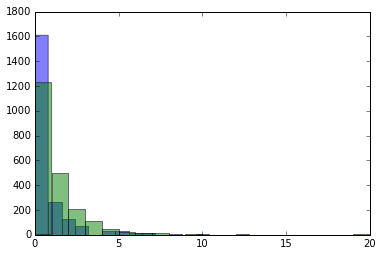

In [147]:
plt.hist(tmp_list_mexican,bins=20,alpha=0.5)
plt.hist(tmp_list_chinese,bins=20,alpha=0.5)

In [148]:
#Add restaurant numbers to DF
#First, add features based on types of restaurants to be queried.
for category_cuisine in category_cuisine_list:
    df['number_restaurants_'+category_cuisine] = 0.0
    df['average_rating_restaurants_'+category_cuisine] = np.nan
    df['unweighed_average_rating_restaurants_'+category_cuisine] = np.nan
    df['closed_number_restaurants_'+category_cuisine] = 0.0
df.head(5)

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI    BOROUGH  \
COUNTY_ID TRACT_ID                                                        
61        100        78638       0.030        0        0.000  Manhattan   
          201        90205       0.035    90672        0.035  Manhattan   
          202       307101       0.119   476903        0.184  Manhattan   
          500       821563       0.317  3296589        1.273  Manhattan   
          600       241361       0.093   189190        0.073  Manhattan   

                    FRAC_LAND        GEOID   INTPTLAT  INTPTLONG     LATMAX  \
COUNTY_ID TRACT_ID                                                            
61        100        1.000000  36061000100  40.690055 -74.046142  40.691318   
          201        0.498709  36061000201  40.709899 -73.985584  40.711814   
          202        0.391708  36061000202  40.708420 -73.978845  40.712407   
          500        0.199498  36061000500  40.690307 -74.017891  40.699444   
          600        0.560586  36061000600  40.709713 -73.987622  40.712667   

                                   ...                  \
COUNTY_ID TRACT_ID                 ...                   
61        100                      ...                   
          201                      ...                   
          202                      ...                   
          500                      ...                   
          600                      ...                   

                    unweighed_average_rating_restaurants_greek  \
COUNTY_ID TRACT_ID                                               
61        100                                              NaN   
          201                                              NaN   
          202                                              NaN   
          500                                              NaN   
          600                                              NaN   

                    closed_number_restaurants_greek  number_restaurants_latin  \
COUNTY_ID TRACT_ID                                                              
61        100                                     0                         0   
          201                                     0                         0   
          202                                     0                         0   
          500                                     0                         0   
          600                                     0                         0   

                   average_rating_restaurants_latin  \
COUNTY_ID TRACT_ID                                    
61        100                                   NaN   
          201                                   NaN   
          202                                   NaN   
          500                                   NaN   
          600                                   NaN   

                    unweighed_average_rating_restaurants_latin  \
COUNTY_ID TRACT_ID                                               
61        100                                              NaN   
          201                                              NaN   
          202                                              NaN   
          500                                              NaN   
          600                                              NaN   

                   closed_number_restaurants_latin  \
COUNTY_ID TRACT_ID                                   
61        100                                    0   
          201                                    0   
          202                                    0   
          500                                    0   
          600                                    0   

                    number_restaurants_japanese  \
COUNTY_ID TRACT_ID                                
61        100                                 0   
          201                                 0   
          202                                 0   
          500       

In [149]:
for category_cuisine in category_cuisine_list:
    for (key,value) in yelp_dict[category_cuisine].items():
        scores = []
        weights = []
        closed_biz = 0.0
        open_biz = 0.0
        if len(value) > 0:
            for j in range(len(value)):
                if value[j]['is_closed'] == False:
                    print "open!"
                    scores.append(float(value[j]['rating']))
                    weights.append(float(value[j]['review_count']))
                    open_biz += 1
                elif value[j]['is_closed'] == True:
                    print "closed!"
                    closed_biz += 1
            scores = np.array(scores)
            weights = np.array(weights)
            weighed_score = np.average(scores, weights = weights)
            unweighed_score = np.average(scores)
            print key, open_biz, type(key), type(open_biz), type(df.ix[:,"GEOID"])
            df.loc[df["GEOID"].astype(str) == key,"number_restaurants_"+category_cuisine] = open_biz
            df.loc[df["GEOID"].astype(str) == key,"closed_number_restaurants_"+category_cuisine] = closed_biz
            df.loc[df["GEOID"].astype(str) == key,"average_rating_restaurants_"+category_cuisine] = weighed_score
            df.loc[df["GEOID"].astype(str) == key,"unweighed_average_rating_restaurants_"+category_cuisine] = unweighed_score
            #print float(value[0]['rating']),float(value[0]['review_count'])

open!
36081099701 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36047051700 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36047013900 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36005030000 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36081073100 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36081103900 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
open!
36061003900 2.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36047019400 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36047007500 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061012900 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36081010701 1.0 <type 'str'> <type 'float'> <class 'pandas.core.series.Series'>
open!
36061016900 1.0 <type 'str'> <type 'float'

KeyboardInterrupt: 

In [ ]:
df.closed_number_restaurants_chinese/df.number_restaurants_chinese

In [ ]:
df.loc[:,["ZIPCODE","INTPTLONG","INTPTLAT","number_restaurants_chinese","number_restaurants_mexican","average_rating_restaurants_mexican"]]

In [ ]:
n, bins, patches = plt.hist(df[~np.isnan(df["average_rating_restaurants_chinese"])]["average_rating_restaurants_chinese"],alpha=0.5)
plt.hist(df[~np.isnan(df["unweighed_average_rating_restaurants_chinese"])]["unweighed_average_rating_restaurants_chinese"],bins=bins,alpha=0.5)
plt.xlabel("Average Rating for Chinese Restaurants per Area")

In [112]:
len(yelp_data.keys()), len(yelp_dict.keys())

(2, 2)